![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [18]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [22]:
# preprocessing the data for building the model
penguins_df['sex'] = pd.get_dummies(penguins_df['sex'], drop_first=True)

scaler = StandardScaler()
X = scaler.fit_transform(penguins_df)
penguins_df = pd.DataFrame(data=X, columns=penguins_df.columns)

penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,-0.903906,0.790360,-1.425342,-0.566948,0.993994
1,-0.830434,0.126187,-1.068577,-0.504847,-1.006042
2,-0.683490,0.432728,-0.426399,-1.187953,-1.006042
3,-1.344738,1.096901,-0.569105,-0.939551,-1.006042
4,-0.867170,1.761074,-0.783164,-0.691149,0.993994


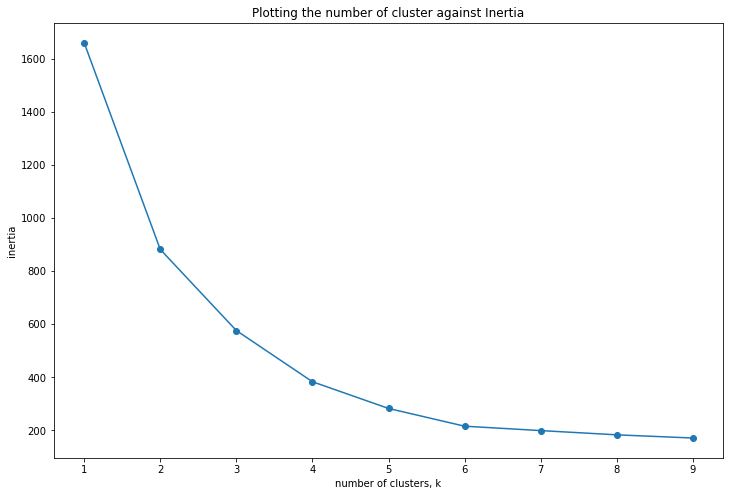

In [23]:
# fitting the model to determine the number of clusters
inertias = []
ks = range(1, 10)

for k in ks:
    model = KMeans(n_clusters=k, random_state=42)

    model.fit(penguins_df)

    inertias.append(model.inertia_)


# plotting the inertia
plt.figure(figsize=(12, 8))
plt.plot(ks, inertias, '-o')
plt.title("Plotting the number of cluster against Inertia")
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()



In [25]:
# building the model with the optimal K
n_clusters = 4
final_model = KMeans(n_clusters=n_clusters)
final_model.fit(penguins_df)

penguins_df['label'] = final_model.labels_

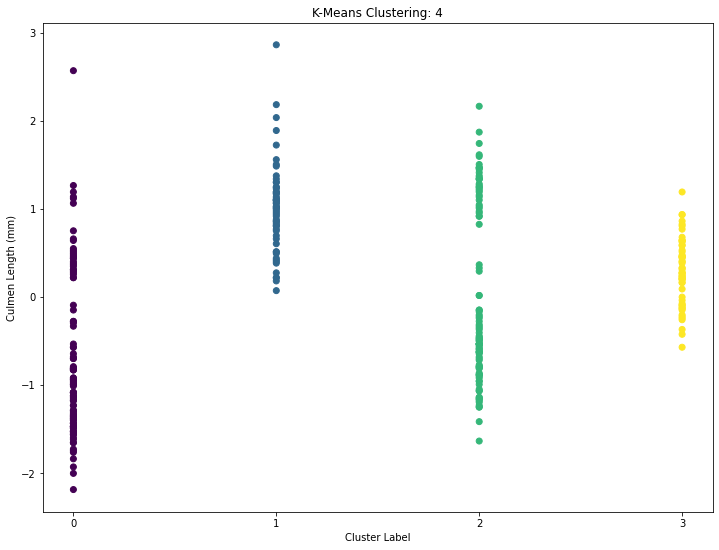

In [28]:
# visualizing the clusters
plt.figure(figsize=(12, 9))
plt.scatter(penguins_df['label'], penguins_df['culmen_length_mm'], c=final_model.labels_, cmap='viridis')
plt.xlabel('Cluster Label')
plt.ylabel('Culmen Length (mm)')
plt.xticks(range(int(penguins_df['label'].min()), int(penguins_df['label'].max()) + 1))
plt.title(f'K-Means Clustering: {n_clusters}')
plt.show()

In [30]:
stat_penguins = penguins_df[['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'label']].groupby('label').mean()
stat_penguins

,culmen_length_mm,culmen_depth_mm,flipper_length_mm
label,,,
0,-0.698596,0.234097,-0.851183
1,1.001551,-0.733134,1.467381
2,-0.026226,1.000505,-0.443228
3,0.283365,-1.489322,0.837042
